## Lagrange interpolation

Given $(n+1)$ distinct points $\{q_i\}_{i=0}^n$ in the interval $[0,1]$,
we define the *Lagrange interpolation* operator $\mathcal{L}^n$ the operator
$$
\mathcal{L}^n : C^0([0,1]) \mapsto \mathcal{P}^n
$$
which satisfies
$$
(\mathcal{L}^n f)(q_i) = f(q_i), \qquad i=0,\dots,n.
$$

This operator is used to approximate the infinitely dimensional space $C^0([0,1])$ with a
finite dimensional one, $\mathcal{P}^n$, which is the space of polynomials of order n. 

Such a space has dimension $n+1$, and can be constructed using linear combinations of 
monomials of order $\leq n$:

$$
\mathcal{P}^n = \text{span}\{p_i := x^i\}_{i=0}^{n}
$$

Let's start by importing the usual suspects:

In [1]:
%matplotlib inline
# from numpy import *
# from pylab import *
import numpy as np
import pylab as pl

In what follows, we will plot several functions in the interval $[0,1]$, 
so we start by defining a linear space used for plotting. As a good habit, 
we choose a number of points which would generate intervals that are 
exactly representable in terms of a binary base.

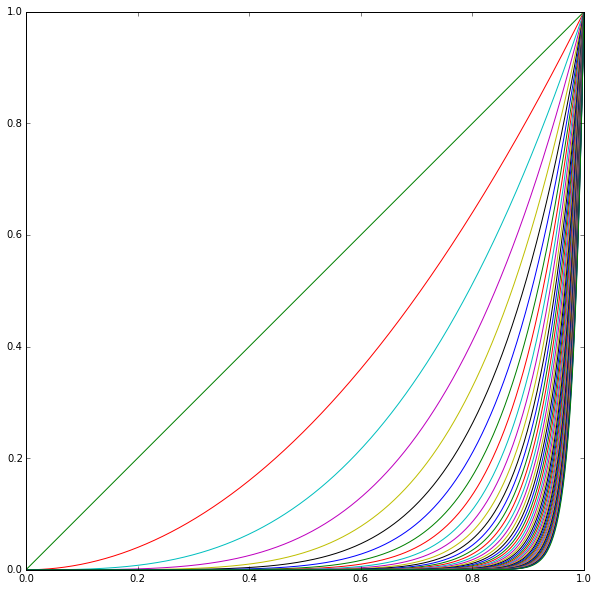

In [2]:
ref = 1025 # So that x_i+1 - x_i is exactly representable in base 2
x = np.linspace(0,1,ref)

n = 50 # Polynomials of order 5, with dimension 6

# We store the basis of Pn row-wise. This is memory efficient if we want to access
# all the values of the basis at once
Pn = np.zeros((n+1, len(x)))

for i in range(n+1):
    Pn[i] = x**i

# The _ = in front of the plot command is only there to ignore the output of the plot
# command
pl.figure(figsize=[10,10])
_ = pl.plot(x, Pn.T)


If we want to construct the Lagrange interpolation of a given function on $n+1$ equispaced points in 
$[0,1]$, then we are actively looking for an element of $\mathcal{P}^n$ that coincides with the function
at these given points.

Given a basis $\{p_i\}_{i=0}^n$, any element of $\mathcal{P}^n$ can be written as a linear combination of 
the basis, i.e., 

$$
\forall u \in \mathcal{P}^n, \quad  \exists! \{u^i\}_{i=0}^n  \quad| \quad u(x) = \sum_{i=0}^n u^i p_i(x)
$$

in what follows, we'll use [Einstein summation convention](https://en.wikipedia.org/wiki/Einstein_notation), and 
call $u$ both the function of $\mathcal{P}^n$, or the $R^{n+1}$ vector representing its coefficients. 

**Remark on the notation**

We use upper indices to indicate both "contravariant" coefficients and the *canonical basis of the dual space*, 
i.e., the linear functionals in $(\mathcal{P}^n)^*$ such that 

$$
(\mathcal{P}^n)^* := \text{span}\{p^i\}_{i=0}^{n} \qquad | \qquad p^i(p_j) = \delta^i_j\qquad i,j = 0, \ldots, n
$$

With this notation, we have that the coefficients of a polynomial are uniquely determined by

$$
u^i = p^i(u)
$$

where the $u$ on the right hand side is an element of $\mathcal{P}^n$ (not its coefficients).

If we want to solve the interpolation problem above, then we need to find the coefficients $u^i$ of the 
polynomial $u$ that interpolates $f$ at the points $q_i$:

$$
p_j(q_i) u^j = f(q_i)
$$

(Remember Einstein summation convention)

This can be written as a linear problem $A u = F$, with system matrix $A_{ij} :=  p_j(q_i)$ and right 
hand side $F_i = f(q_i)$.

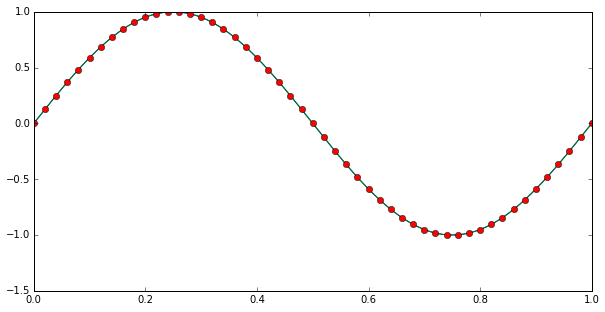

In [3]:
# The interpolation points
q = np.linspace(0,1,n+1)

A = np.zeros((n+1, n+1))
for j in range(n+1):
    A[:,j] = q**j

# The interpolation function
f = lambda x: np.sin(2*np.pi*x)

# The right hand side
F = f(q)

# The coefficients
u = np.linalg.solve(A, F)

# Make a nice looking plot
pl.figure(figsize=[10,5])
_ = pl.plot(x, f(x))
_ = pl.plot(x, Pn.T.dot(u))
_ = pl.plot(q, f(q), 'ro')

Is this a good way to proceed with the interpolation? How about the condition number of $A$? Is it good?

Let's try with an increasing number of points (and degrees):

In [4]:
for i in range(3,15):
    qtmp = np.linspace(0,1,i)
    Atmp = np.zeros((i,i))
    for j in range(i):
        Atmp[:,j] = qtmp**j
        
    print("Condition number: n=", i, ":", np.linalg.cond(Atmp))


Condition number: n= 3 : 15.0996577225
Condition number: n= 4 : 98.8677385072
Condition number: n= 5 : 686.434941819
Condition number: n= 6 : 4924.37105661
Condition number: n= 7 : 36061.1608802
Condition number: n= 8 : 267816.700908
Condition number: n= 9 : 2009396.38002
Condition number: n= 10 : 15193229.6772
Condition number: n= 11 : 115575244.508
Condition number: n= 12 : 883478685.733
Condition number: n= 13 : 6780588427.12
Condition number: n= 14 : 52214930592.0


As we see, the condition number of this matrix explodes as n increases. Since the interpolation problem 
reduces to solving the matrix constructed as $A_{ij} := p_j(x_i)$, one way to ensure a good condition number
is to choose the basis such that $A$ is the identity matrix, i.e., to choose the basis such that $p_j(x_i) = \delta_{ij}$. Such a basis is called the **Lagrange basis**, and it is constructed explicitly as:


$$
l^n_i(x) := \prod_{j=0, j\neq i}^n \frac{(x-x_j)}{(x_i-x_j)}  \qquad
i = 0, \dots, n
$$

With this basis, no matrix inversion is required, and we can simply write the Lagrange interpolation as
$$
\mathcal{L}^n f := \sum_{i=0}^n f(x_i) l^n_i(x),
$$

> Given a set of $(n+1)$ distinct points
> $\{x_i\}_{i=0}^n$ , there exist a unique Lagrange interpolation of order
> $n$.

In [5]:
Ln = np.zeros((n+1, len(x)))

for i in range(n+1):
    Ln[i] = np.product([ (x-q[j])/(q[i]-q[j]) for j in range(n+1) if j != i], axis=0)

# _ = pl.plot(x,Ln.T)
# _ = pl.plot(q,np.zeros_like(q),'ro')


####

from scipy import optimize

def min_fun(q):
    n = len(q) - 1
    Ln = np.zeros((n+1, len(x)))

    for i in range(n+1):
        Ln[i] = np.product([ (x-q[j])/(q[i]-q[j]) for j in range(n+1) if j != i], axis=0)
    
    return abs(Ln).max()

# solution = optimize.minimize(min_fun,q,bounds=[(0,1)]*len(q))

# optimize.minimize()
# ss = min_fun(np.sin(x))
# print(ss)

Now the interpolation in the sampling points is simply:

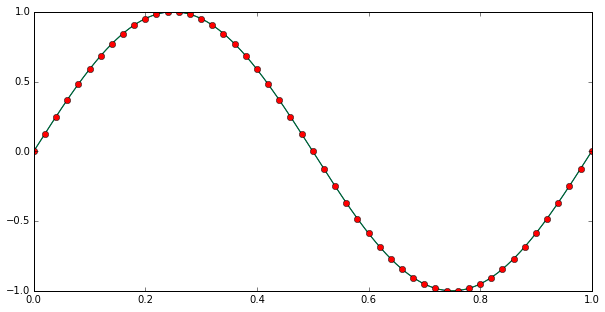

In [6]:
y = Ln.T.dot(f(q))

pl.figure(figsize=[10,5])
_ = pl.plot(x, f(x))
_ = pl.plot(x, y)
_ = pl.plot(q, f(q), 'ro')

Let's try different functions:

In [7]:
from numpy import *
from pylab import *

In [8]:
q = np.sort(np.array([0]+np.random.random(n-2).tolist()+[1]))

In [9]:
q=q1
q1

NameError: name 'q1' is not defined

In [ ]:
n

In [ ]:
Ln = np.zeros((n+1, len(x)))
# print(len(Ln))
for i in range(n+1):
    Ln[i] = np.product([ (x-q[j])/(q[i]-q[j]) for j in range(n+1) if j != i], axis=0)

In [ ]:
# q1 = q
q = q1

In [ ]:
runge(q)

In [ ]:
# A little "macro". This assumes Ln, q, and x are all defined
# Notice: technically this is a python function. However, it 
# expects symbols and variables to be defined in the global scope
# and this is **not** good programming style. It may be very 
# useful and fast at times, but try not to overdo it.
#
# I'd call it a function if internally it did not use any globally
# defined variable.

def my_plot(f):
    figure(figsize=[10,5])
    y = Ln.T.dot(f(q))
    _ = plot(x, f(x))
    _ = plot(x, y)
    _ = plot(q, f(q), 'ro')
    show()

# my_plot(sin)
# my_plot(cos)

# When we need something more complicated than simply cos, or sin, 
# we can use "on the fly" function definitions, or lambda functions:
# my_plot(lambda x: cos(2*pi*x))

# Lambda functions can be assigned too, for convenience and later 
# reuse...
runge = lambda x: 1.0/(1+50*(.5-x)**2)
my_plot(runge)

# Alternatively, you can define the function in the classical pythonic
# way:
def shifted_abs(x):
    return abs(x-.5)

my_plot(shifted_abs)